In [1]:
!pip install mrsimulator

## Accessing spin systems from file

The $^{13}C$ chemical shift tensor values used in this example are obtained from Wylie. *et. al.*[1]

In [1]:
from mrsimulator import Simulator
from mrsimulator.methods import BlochDecaySpectrum

import matplotlib.pyplot as plt

In [2]:
sim = Simulator()
print(len(sim.spin_systems))

0


Load spin systems from an external file or database

In [3]:
sim.load_spin_systems('protein_GB1.mrsys')

In [4]:
print(len(sim.spin_systems))

55


In [25]:
sim.spin_systems[2].to_dict_with_units()

{'name': 'K4',
 'sites': [{'isotope': '13C',
   'isotropic_chemical_shift': '54.9 ppm',
   'shielding_symmetric': {'zeta': '-18.2 ppm', 'eta': 0.74}}],
 'abundance': '0.01818181818181818 %'}

**Method**

In [27]:
method = BlochDecaySpectrum(
    channels=["13C"],
    magnetic_flux_density='11.7',
    rotor_angle=54.735 * 3.1415/180,
    rotor_frequency=2600,
    spectral_dimensions=[
        {
            "count": 2048,
            "spectral_width": 18000, # in Hz
            "reference_offset": 7000 # in Hz
        }
    ],
)
sim.methods = [method]  # add the method

In [30]:
sim.run()

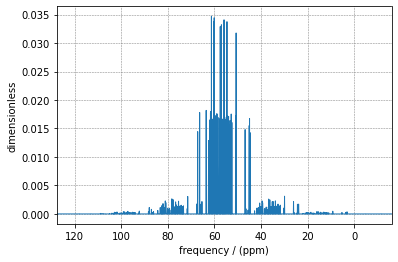

In [31]:
ax = plt.subplot(projection="csdm")
ax.plot(sim.methods[0].simulation, linewidth=1)
ax.invert_xaxis()
# plt.tight_layout()
plt.show()

In [32]:
import mrsimulator.signal_processing as sp
import mrsimulator.signal_processing.apodization as apo

In [33]:
processor = sp.SignalProcessor(
    operations=[
        sp.IFFT(),
        apo.Exponential(FWHM="20 Hz"),
        sp.FFT(),
    ]
)
processed_data = processor.apply_operations(data=sim.methods[0].simulation)

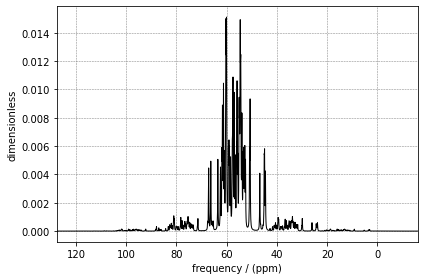

In [34]:
# The plot of the simulation after signal processing.
ax = plt.subplot(projection="csdm")
ax.plot(processed_data.real, color="black", linewidth=1)
ax.invert_xaxis()
plt.tight_layout()
# plt.savefig('Protein_GB1.pdf')
plt.show()

1. Wylie, B. J., Schwieters, C. D., Oldfield, E., Rienstra C. M., Protein Structure Refinement Using 13C$\alpha$ Chemical Shift Tensors, J. Am. Chem. Soc. **2009**, *131*, 985-992. [DOI: 10.1021/ja804041p](https://pubs.acs.org/doi/10.1021/ja804041p).